# Aula 2 - SVM

Agora que já nos familiarizamos um pouco com o SVM, vamos começar a nos aprofundar um pouco mais no funcionamento do modelo e em seus parâmetros. Vamos explorar os seguintes tópicos:

- 1) Introdução
- 2) Classificadores de margem
- 3) Support Vector Machines
- 4) Funções de kernel
- 5) SVM na prática com o sklearn
- 6) SVM para regressão 

____
____
____

## 1) Introdução

Na aula de hoje, falaremos sobre um dos mais interessantes métodos de aprendizagm supervisionada: **SVM** (**S**upport **V**ector **M**achines).

Este método tem uma construção extremamente elegante e robusta, que, apesar de complexa, pode ser entendida em termos geométricos simples. Nesta aula, vamos explorar os principais aspectos desta construção, em uma apresentação mais alto-nível, sem nos preocuparmos demais com os detalhes matemáticos.

Um ponto importantíssimo sobre SVMs, que é o que de fato lhes confere poder tão elevado, é sua **capacidade de produzir uma hipótese simples, a partir de um conjunto de hipóteses complexo**, o que tem consequências diretas na **capacidade de generalização** de modelos SVM: eles são capazes de generalizar muito bem, apesar das hipóteses produzidas parecerem altamente complexas, o que é algo formidável!

Não entraremos nos detalhes matemáticos que justificam e provam os pontos acima. Mas, para quem tiver interesse, quase todo livro-texto de machine learning aborda estas questões. Recomendo, em particular, [este livro](https://www.google.com.br/books/edition/Learning_with_Kernels/7r34DwAAQBAJ?hl=pt-BR&gbpv=1&dq=learning+with+kernels&printsec=frontcover), que detalha extensivamente SVM e métodos relacionados; ou então [este livro](https://cs.nyu.edu/~mohri/mlbook/), que aborda formalmente a teoria de aprendizagem, eventualmente culminando no enorme sucesso de SVMs. Por fim, aproveito também pra recomendar [este curso](https://work.caltech.edu/index.html) do Caltech, onde os tópicos abordados no livro do Mohri são apresentados de maneira clara, direta, e muito ilustrativa. Esta é minha maior recomendação para quem tem interesse em iniciar os estudos em teoria de aprendizagem estatística, e então ter todo o fundamento rigoroso pra entender porque SVMs são tão interessantes!

Agora, vamos iniciar nossa exposição, introduzindo um conceito fundamental para SVMs: a **margem**, e os chamados **classificadores de margem**.

____
____
____

## 2) Classificadores de margem

Considere o seguinte dataset supervisionado de um problema de classificação binário:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/d8d83e07-66d8-47c6-a5e4-4a3e232481e2.PNG width=400>

É visível que os dados são linearmente separáveis. De fato, existem infinitas retas possíveis que separam perfeitamente as duas classes. Alguns exemplos:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/bbf3d0a6-4707-471b-9f19-7290c13e4f23.PNG width=400>

Vamos olhar separadamente para cada um destes três modelos:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/6c0bea51-dda9-400c-bb68-d7396e4fa606.PNG width=900>

Apesar de ambos separarem perfeitamente os dados de treino (erro de treino é nulo!), podemos nos perguntar: qual deles tem potencial de apresentar **melhor generalização?**

Para refletirmos sobre isso, considere que queremos classificar o ponto de teste indicado em preto:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/fbed2deb-bb38-4ef5-8558-99b7aff5c7b7.PNG width=900>

É super razoável que este ponto seja classificado como sendo da classe vermelha, não é mesmo? No entanto, o primeiro classificador irá classificá-lo como pertencente à classe azul.

Podemos nos perguntar: por que isso acontece?

Intuitivamente, é possível dizer que a fronteira de decisão do primeiro modelo está "**muito próxima**" dos pontos da classe vermelha, não é? 

Mas, se estamos avaliando a **fronteira de decisão**, é razoável que nos importemos, na realidade, com a proximidade entre ela **e os "pontos mais externos"** da respectiva classe, não é mesmo? Afinal, intuitivamente, estes são os pontos que exercem maior influência sobre a fornteira de decisão, justo?

É aqui que entra o conceito de **margem**:

> Chamamos de **margem** a **menor distância** entre os pontos de treino e a fronteira de decisão

A seguir, visualizamos as margens associadas a cada um dos três modelos:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/72f191fc-7bc0-4451-923a-ecb939e88111.PNG width=900>

Dada a definição de margem, fica claro que o terceiro modelo seria nossa melhor opção, pois ele **apresenta maior margem**. De fato, intuitivamente, um classificador que apresenta maior margem, terá melhores chances de generalização!

> Chamamos de **classificador de margem máxima** um classificador **linear** que é construído de modo que a margem seja maximizada.

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<h2>Conclusões</h2>
<ul>
<li>Um classificador de margem máxima tem alto potencial de generalização, para dados linearmente separáveis;
</ul>
</span>
<br>
</div>

### Classificador de margem suave

Um classificador de margem suave é obtido com uma modificação extremamente simples com relação ao classificador de margem máxima: a permissão de que **erros de classificação** sejam cometidos na base de treino! Uma possível solução seria algo assim:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/cfacd48d-9713-4bec-9fd7-ea1b4ae380f5.PNG width=400>

Neste caso, temos duas observações incorretas dentro da margem - e está tudo bem, pois dados que estas observações são outliers, não precisamos mos preocupar em ajustar a margem a elas!

Com isso, temos um modelo com um viés um pouco maior, mas com variância bem menor - caminhamos na direção do **sweet spot** de generalização!!

Note, portanto, que a introdução de uma margem suave pode ser visto como **um procedimento de regularização** aplicado ao classificador de margem! E é exatamente assim que veremos este procedimento quando chegarmos em SVM - um procedimento de regularização!

Um classificador de margem suave é também chamado de **classificador de vetores de suporte (*support vector classifier*)**, sendo que os pontos que "apoiam" a margem são justamente os chamados **vetores de suporte (*support vectors*)**.

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<h2>Conclusões</h2>
<ul>
<li>Um classificador de margem máxima tem alto potencial de generalização, para dados linearmente separáveis;<br><br>
<li>Um classificador de margem suave (vetores de suporte) introduz um pouco mais de viés ao permitir erros de treino, mas, com isso, aumenta o potencial de generalização, e pode ser aplicável a dados que não são exatamente linearmente separáveis;
</ul>
</span>
<br>
</div>

Estamos chegando perto das SVMs!

Mas, antes de chegarmos lá, é importante frisarmos um ponto fundamental:

> A **fronteira de decisão** de um classificador de margem suave (de vetores de suporte) é **linear** no espaço de features em que o classificador é treinado, ou seja, a hipótese treinada (isto é, a superfície de decisão) será **um hiperplano** de dimensão $D-1$, onde $D$ é a dimensão do espaço de features

Vamos entender melhor o comentário acima com alguns exemplos:

### $D=2$

Se temos uma duas features$(X_1, X_2)$, teremos um **hiperplano $1-$dimensional**, que nada mais é que **uma reta** como fronteira de decisão:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/6ca9b6d4-90fb-4d92-8a73-42ecec09d562.PNG width=400>

### $D=3$

Se temos uma três features$(X_1, X_2, X_3)$, teremos um **hiperplano $2-$dimensional**, que nada mais é que **um plano** como fronteira de decisão:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/b91951b3-9256-4a38-abd6-287811332db8.PNG width=400>

### $D=1$

Se temos uma única feature $(X)$, teremos um **hiperplano $0-$dimensional**, que nada mais é que **um ponto** como fronteira de decisão:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/000d5eb5-25e7-485b-bf36-6ad944970e27.PNG width=400>

Para dimensões maiores, $D > 3$, não conseguimos mais visualizar a fronteira de decisão, mas, se qualquer forma, ela será linear (por isso, um hiper**plano**!).

Agora estamos prontos para introduzir as tão aguardadas **Support Vector Machines!**

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<h2>Conclusões</h2>
<ul>
<li>Um classificador de margem máxima tem alto potencial de generalização, para dados linearmente separáveis;<br><br>
<li>Um classificador de margem suave (vetores de suporte) introduz um pouco mais de viés ao permitir erros de treino, mas, com isso, aumenta o potencial de generalização, e pode ser aplicável a dados que não são exatamente linearmente separáveis;<br><br>
<li>A fronteira de decisão de um classificador de margem sempre será linear no espaço de features;
</ul>
</span>
<br>
</div>

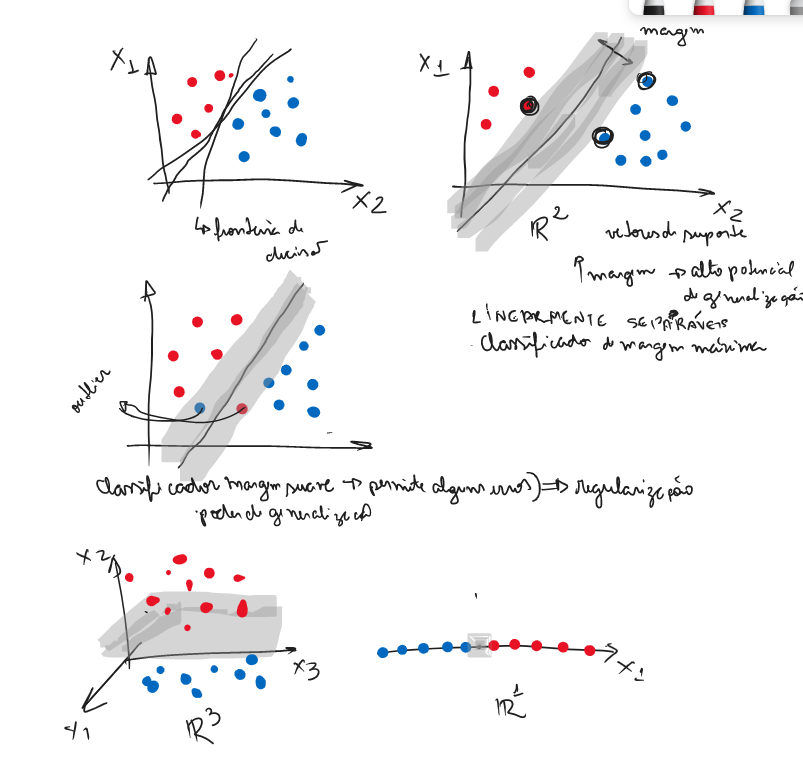

____
____
____

## 3) Support Vector Machines

Imagine que temos o seguinte dataset (com uma única dimensão):

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/e00c77e0-14fb-472f-b9ae-f6af7b229ad5.PNG width=400>

É evidente que este dataset **não é linearmente separável**! Portanto, não conseguimos produzir um classificador de vetores de suporte para este dataset **no espaço de features original**.

Mas, aí entra uma ideia muito interessante: e se nós **levarmos os dados para um ou outro espaço?**

Seria possível que no espaço original os dados não sejam linearmente separáveis, mas **o sejam** em algum outro espaço?

Bom, a priori, vamos tentar algo bem simples... Que tal introduzirmos **uma nova feature** $X_2 = X_1^2$? O que aconteceria neste caso?

De fato, ao **introduzirmos** uma nova feature, estamos fazendo com que **cada observação passe a ser caracterizada por duas features ao invés de uma única**!

Ou seja, nosso espaço de features efetivamente muda de $\mathbb{R}^1$ para $\mathbb{R}^2$! Veja:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/8d5e6199-8a33-45cf-9e4f-c6507024fb36.PNG width=800>

O procedimento que fizemos é chamado de **feature map**, e ele é matematicamente representado pelo mapa (função) $\Phi$. 

> Como $\Phi$ leva observações do espaço original ($1$D, uma única feature $X_1$, para vetores do novo espaço ($2$D, duas features, $X_1$ e $X_2$), o denotamos como: 
$$\begin{align*}
\Phi \ \colon \ & \mathbb{R}^1 \longrightarrow \mathbb{R}^2 \\
& \vec{x} = X_1 \longmapsto \Phi(\vec{x}) = (X_1, X_2)
\end{align*}$$

Note que no caso ilustrado acima, temos $X_2 = X_1^2$, isto é, $\Phi(\vec{x}) = (X_1, X_1^2)$.

Um pouco mais de terminologia:

> O "espaço original" é comumente chamado de **espaço de input** (representaremos por $\mathcal{X}$); enquanto o espaço após a aplicação do feature map é chamado de **espaço de features (representaremos por $\mathcal{Z}$)**

<img src=https://miro.medium.com/max/872/1*zWzeMGyCc7KvGD9X8lwlnQ.png width=400>

Também é comum se referir ao espaço de features como **espaço z**, devido à comum notação $\Phi(\vec{x}) \equiv \vec{z}$. Neste caso, teríamos:

$$\begin{align*}
\Phi \ \colon \ & \mathbb{R}^1 \longrightarrow \mathbb{R}^2 \\
& \vec{x} = X_1 \longmapsto \Phi(\vec{x}) = \vec{z} = (Z_1, Z_2)
\end{align*}$$

Uma vez que temos estas definições, podemos perceber a real utilidade do feature map: **os dados não eram linearmente separáveis no espaço de input, mas passaram a ser no espaço de features!**

Isso é realmente formidável, pois, se temos dados linearmente separáveis, podemos **treinar um classificador de margem suave** no espaço de features!

Isso pode parecer estranho, pois, afinal, gostaríamos de separar os dados no espaço original, não é mesmo?

Na verdade, nosso objetivo é que os dados sejam separados, **não importa em que espaço**! Se conseguirmos encontrar um espaço onde há separabilidade através da aplicação de um feature map, bastaria **aplicar o mesmo feature map** aos dados de treino e de teste, e a separabilidade sempre estará garantida!

Muito legal, não é mesmo?
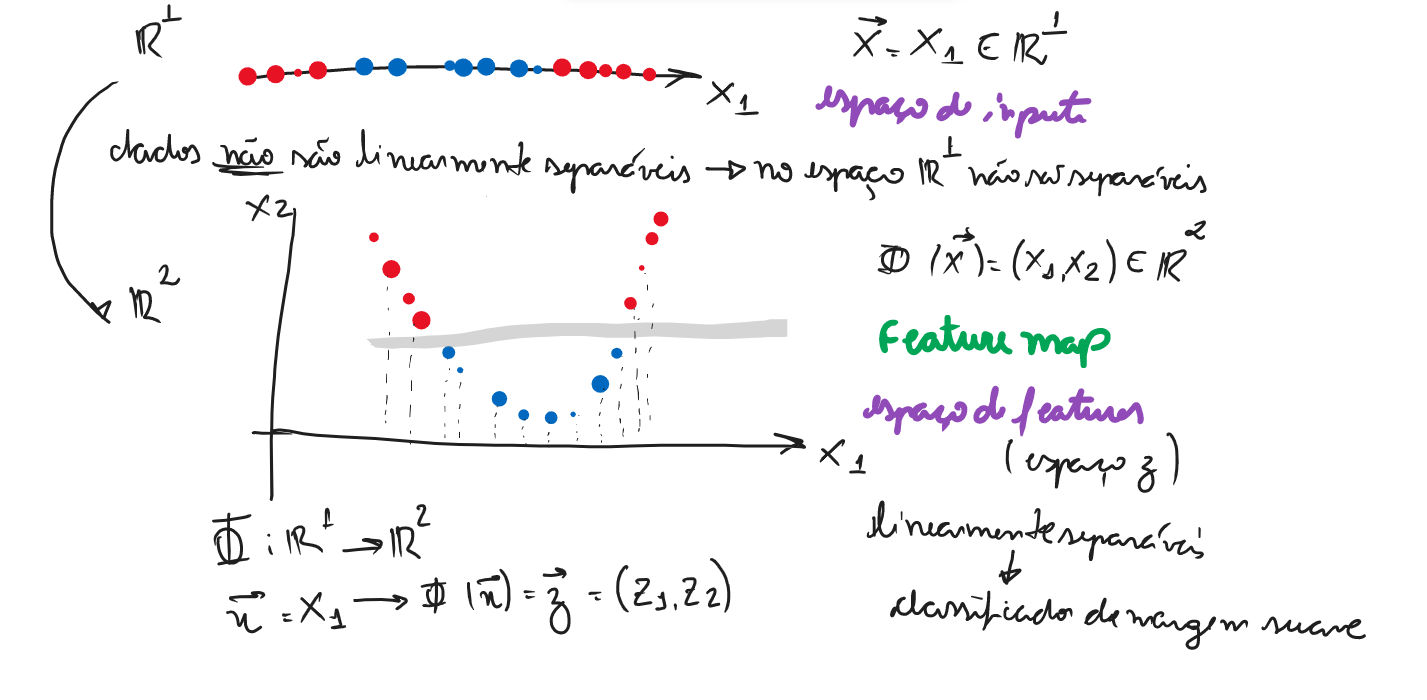

Vamos gerar alguns dados pra ver isto funcionando na prática:

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
np.random.seed(42)

data = {'X_1': np.random.normal(0,1,20)}

df = pd.DataFrame(data)
df['y'] = df['X_1'].apply(lambda x: 1 if abs(x) > 1.1 else 0)
df

,X_1,y
0,0.496714,0
1,-0.138264,0
2,0.647689,0
3,1.523030,1
4,-0.234153,0
5,-0.234137,0
6,1.579213,1
7,0.767435,0
8,-0.469474,0
9,0.542560,0


<Axes: xlabel='X_1'>

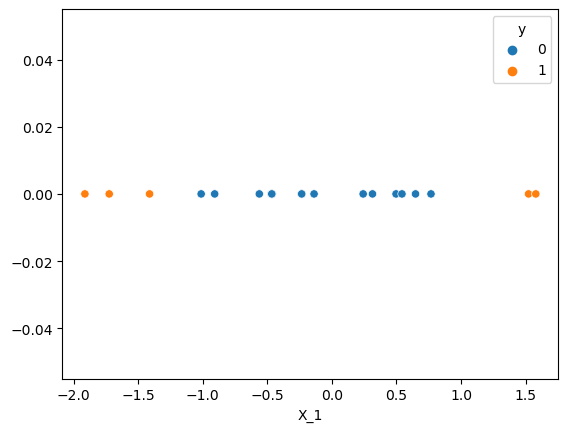

In [5]:
sns.scatterplot(data = df, x='X_1', y=np.zeros(df.shape[0]), hue = 'y')

In [6]:
df['X_2'] = df['X_1']**2

In [7]:
df

,X_1,y,X_2
0,0.496714,0,0.246725
1,-0.138264,0,0.019117
2,0.647689,0,0.419500
3,1.523030,1,2.319620
4,-0.234153,0,0.054828
5,-0.234137,0,0.054820
6,1.579213,1,2.493913
7,0.767435,0,0.588956
8,-0.469474,0,0.220406
9,0.542560,0,0.294371


<Axes: xlabel='X_1', ylabel='X_2'>

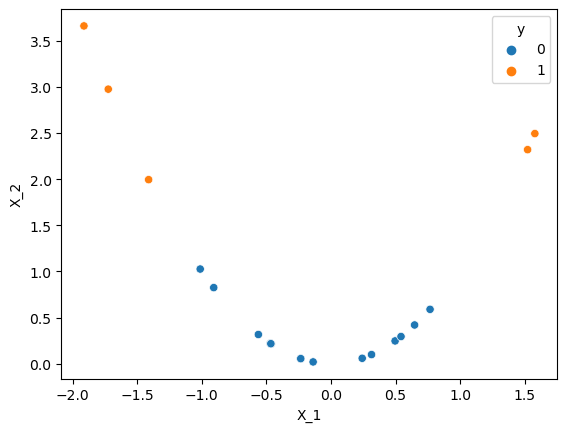

In [8]:
sns.scatterplot(data = df,
               x = 'X_1',
               y = 'X_2',
               hue = 'y')

E claro, embora tenhamos visto um feature map do tipo $\Phi : \mathbb{R}^1 \rightarrow \mathbb{R}^2$, eles podem assumir as mais diferentes formas! Em geral, podemos definir um feature map genérico como $\Phi : \mathcal{X} \rightarrow \mathcal{Z}$ (de forma concreta, $\Phi : \mathbb{R}^m \rightarrow \mathbb{R}^n$, para $m, n$ dimensões arbitrárias!)

Mais um exemplo, $\Phi : \mathbb{R}^2 \rightarrow \mathbb{R}^3$:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/105e0718-f938-4d09-919a-b37f79b410f7.PNG width=400>

<img src=https://i.pinimg.com/originals/bc/6b/75/bc6b756f5bf44b54f269b2c076cff162.gif width=400>

Finalmente, agora temos todos os elementos necessários para entender o que são as SVMs:

> Uma **Support Vector Machine** nada mais é que **um classificador de margem suave** treinado **no espaço de features**. Portanto, este classificador pressupõe a aplicação prévia de um **feature map** aos dados no espaço de input.

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<h2>Conclusões</h2>
<ul>
<li>Um classificador de margem máxima tem alto potencial de generalização, para dados linearmente separáveis;<br><br>
<li>Um classificador de margem suave (vetores de suporte) introduz um pouco mais de viés ao permitir erros de treino, mas, com isso, aumenta o potencial de generalização, e pode ser aplicável a dados que não são exatamente linearmente separáveis;<br><br>
<li>A fronteira de decisão de um classificador de margem sempre será linear no espaço de features;<br><br>
<li>Se os dados não forem linearmente separáveis no espaço original (de input), podemos fazer um feature map para levá-los para um espaço de features onde haja separabilidade linear;
</ul>
</span>
<br>
</div>

Da discussão acima, ficou claro que é justamente o feature map que dá grande poder às SVMs. De fato, a possibilidade de conseguirmos separabilidade linear é algo formidável!

Neste contexto, uma pergunta natural é: como escolher um bom feature map? Formalmente, existem infinitos feature maps possíveis! Como escolher, dentre infinitas opções, exatamente o mapa exato que nos garante separabilidade linear no espaço de features? Embora esta pergunta não seja fácil de responder, existem algumas técnicas para nos ajudar a escolher bons feature maps (vamos discutir sobre isso mais a diante).

Além disso, existe um segundo problema, ainda maior: suponha que queiramos introduzir um kernel que leva os pontos para um espaço de features de altíssima dimensionalidade (algo como $\Phi : \mathbb{R}^2 \mapsto \mathbb{R}^{10000}$).

É de se esperar que este seja um feature map **operacionalmente custoso** de ser calculado, não é mesmo? Imagina, ter que aplicar esta transformação para todos os pontos de treino, e depois de teste! De fato, isso rapidamente se torna computacionalmente impraticável...

Pra solucionar este problema, foi introduzido o uso de **funções de kernel** para capturar um aspecto importante dos feature maps! 

Mas, pra entendermos a importância das funções de kernel, é necessário entendermos uma coisa:

> A hipótese do SVM depende apenas do **produto interno** entre as observações no espaço de features!!

A hipótese é a seguinte:

$$f_{H, \alpha}(\vec{x}) = \text{sign} \left ( \sum_{i=1}^N y_i \alpha_i \langle \Phi(\vec{x}) , \Phi(\vec{x}_i) \rangle + b\right ) $$

Entendo os termos:

- Cada $\vec{x}_i$, $i = 1, 2, \cdots, N$ é uma das $N$ **observações de treino**; e cada $y_i$ é o respectivo target;
- Cada $\alpha_i$ é um [multiplicador de lagrange](https://en.wikipedia.org/wiki/Lagrange_multiplier). Podemos entendê-los simplesmente como **coeficientes numéricos associados a cada observação de treino**, sendo que $\alpha_i > 0$. Podemos entender estes coeficientes como sendo substitutos ao $\vec{w}$ (uma representação [dual](https://en.wikipedia.org/wiki/Duality_(optimization)) do hiperplano);
- $\langle \Phi(\vec{x}) , \Phi(\vec{x}_i) \rangle$ é o produto interno entre a observação de teste $\vec{x}$ e cada observação de treino $\vec{x}_i$, **no espaço de features**, ou seja, após a aplicação do feature map!

> **Obs.:** na nossa notação de **espaço z**, poderíamos escrever $\Phi(\vec{x}) = \vec{z}$ e $\Phi(\vec{x}_i) = \vec{z}_i$.
<br><br>
No entanto, vamos manter a notação explicita $\Phi(\vec{x})$. Não parece, mas isso na verdade facilitará nossa notação!


Note que, de fato, apenas o produto interno aparece! E é isso que permite o uso das funções de kernel.

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<h2>Conclusões</h2>
<ul>
<li>Um classificador de margem máxima tem alto potencial de generalização, para dados linearmente separáveis;<br><br>
<li>Um classificador de margem suave (vetores de suporte) introduz um pouco mais de viés ao permitir erros de treino, mas, com isso, aumenta o potencial de generalização, e pode ser aplicável a dados que não são exatamente linearmente separáveis;<br><br>
<li>A fronteira de decisão de um classificador de margem sempre será linear no espaço de features;<br><br>
<li>Se os dados não forem linearmente separáveis no espaço original (de input), podemos fazer um feature map para levá-los para um espaço de features onde haja separabilidade linear;<br><br>
<li>A única coisa que importa pro SVM é o produto interno entre as observações no espaço de features;
</ul>
</span>
<br>
</div>

Vale sempre lembrar que nosso **vetor de features** pode ser representado em um espaço de eixos ortogonais, em que cada eixo representa os valores assumíveis por uma dada feature. Quando olhamos conjuntamente para todas elas, temos um **vetor** neste espaço, que representa precisamente cada uma das nossas features.

<img src=https://ds055uzetaobb.cloudfront.net/image_optimizer/6aaeb27b0fd954d9232de5a9142eb1dc658ea8a1.jpg width=600>

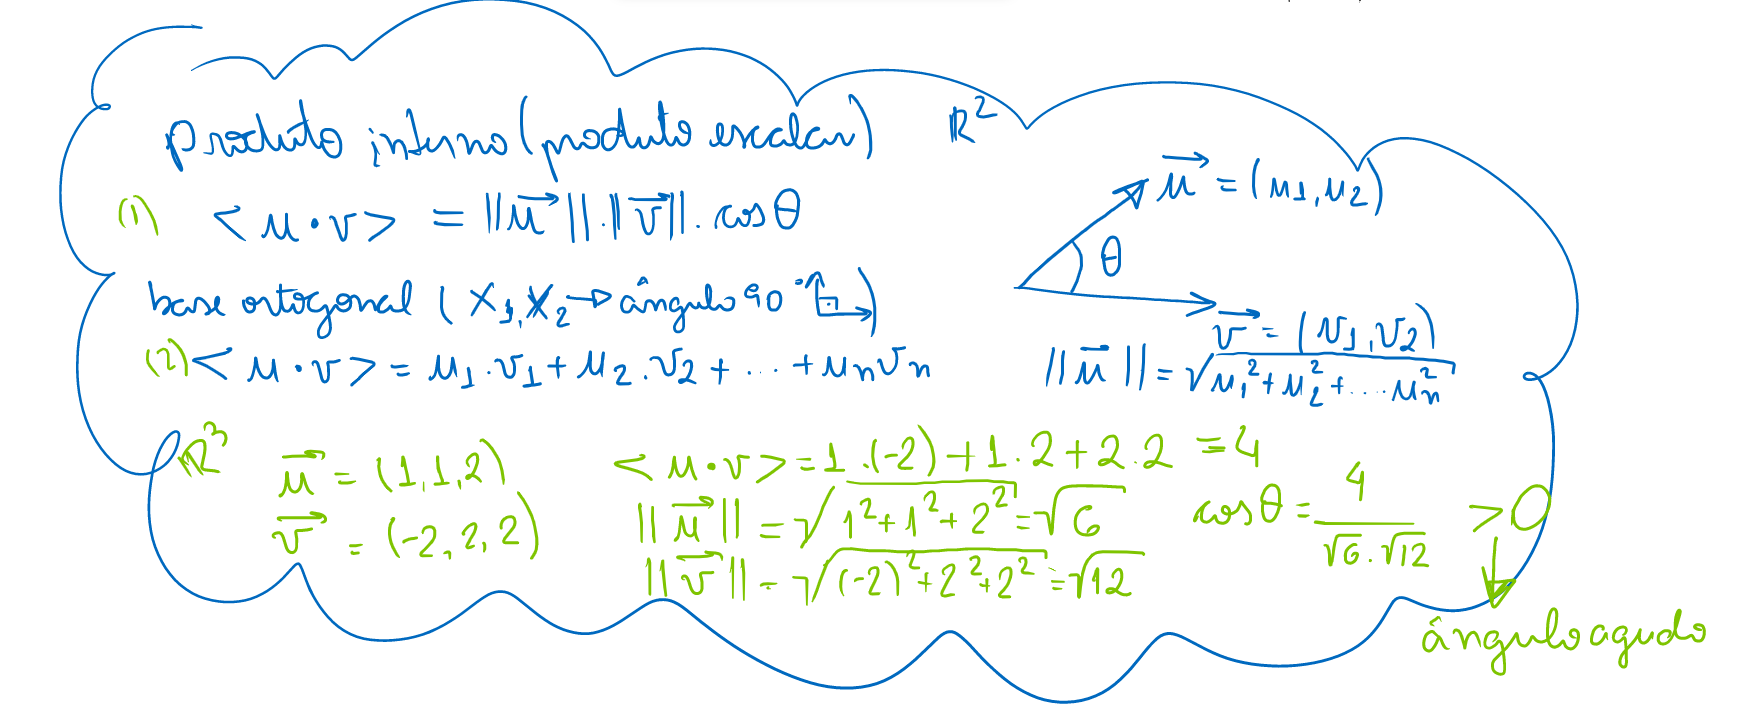

O **produto interno** entre dois vetores pode ser visto como uma medida de projeção de um sobre o outro; ou, alternativamente, como uma medida de quão similares são os dois vetores.

____
____
____

## 4) Funções de kernel

Uma função de kernel $\kappa$ nada mais é que uma **medida de similaridade** entre dois vetores $\vec{x}$ e $\vec{x}'$ (que no nosso caso, são observações). Definimos como:

$$\boxed{\begin{align*}
\kappa \ \colon \ & \mathcal{X} \times \mathcal{X} \longrightarrow \mathbb{R} \\
& (\vec{x}, \vec{x}') \longmapsto \kappa(\vec{x}, \vec{x}')
\end{align*}}$$

Ou seja, um kernel é uma função que, dadas duas observações $\vec{x}$ e $\vec{x}'$, retorna um número real que caracteriza o quão similar as duas observações são entre si.

**Ponto fundamental**: uma função de kernel permite que **o produto escalar** entre duas observações seja calculado **no espaço de features**, sem que precisemos **explicitamente levar as observações pro espaço de features**.

Ou seja, conseguimos **evitar** que o feautre map, que costuma ser custoso computacionalmente, seja explicitamente aplicado!

E uma vez que pro SVM apenas o produto interno interessa, podemos usar diretamente a função de kernel, que é muito mais computacionalmente simples que o feature map explícito!

Esse é o chamado **kernel trick**.

_____________

#### Exemplo de aplicação do kernel trick

Considere que temos $\mathcal{X} = \mathbb{R}^2$, isto é, $\vec{x} = (X_1, X_2)$, um espaço de input de duas dimensões.

Vamos considerar um feature map $\Phi : \mathbb{R}^2 \rightarrow \mathbb{R}^6$, ou seja, teremos $\mathcal{Z} = \mathbb{R}^6$ como espaço de features. Explicitamente, a aplicação do feature map é:

$$\Phi(\vec{x}) = \left(1, X_1^2, X_2^2, \sqrt{2}X_1, \sqrt{2}X_2, \sqrt{2}X_1 X_2 \right )$$

Assim, tomando duas observações genéricas $\vec{x}$ e  $\vec{x}'$, temos:

$$\begin{align*}
\langle \Phi(\vec{x}) , \Phi(\vec{x}') \rangle &= \langle \left(1, X_1^2, X_2^2, \sqrt{2}X_1, \sqrt{2}X_2, \sqrt{2}X_1 X_2 \right ), \left(1, X'^2_1, X'^2_2, \sqrt{2}X'_1, \sqrt{2}X'_2, \sqrt{2}X'_1 X'_2 \right )\rangle =
\\
\\
&= 1 + X_1^2 X'^2_1 + X_2^2 X'^2_2 + \left ( \sqrt{2}X_1 \right) \left ( \sqrt{2}X'_1 \right) + \left ( \sqrt{2}X_2 \right )\left ( \sqrt{2}X'_2  \right )+ \left (\sqrt{2}X_1 X_2 \right )\left (\sqrt{2}X'_1 X'_2 \right )  =
\\
\\
&= 1 + X_1^2 X'^2_1 + X_2^2 X'^2_2 + 2 \left ( X_1 X'_1 + X_2 X'_2 + X_1 X'_1 X_2 X'_2 \right ) 
\end{align*}$$

Vamos rearranjar os termos acima da seguinte maneira:

$$\begin{align*}
\langle \Phi(\vec{x}) , \Phi(\vec{x}') \rangle &= 1 + \left ( X_1^2 X'^2_1 + X_2^2 X'^2_2 + 2  X_1 X'_1 X_2 X'_2  \right ) + 2 \left ( X_1 X'_1 + X_2 X'_2\right ) =
\\
\\
&= 1 + \left ( X_1 X'_1 + X_2 X'_2\right )^2 + 2 \left ( X_1 X'_1 + X_2 X'_2\right ) = 
\\ 
\\
&= \Big ( 1 + \left ( X_1 X'_1 + X_2 X'_2 \right ) \Big)^2
\end{align*}$$

Agora, note que: $\langle \vec{x} , \vec{x}' \rangle = \langle (X_1, X_2), (X'_1, X'_2) \rangle = X_1 X'_1 + X_2 X'_2$, exatamente como aparece no resultado acima! Sendo assim, temos: 

$$\langle \Phi(\vec{x}) , \Phi(\vec{x}') \rangle = \left ( 1 + \langle \vec{x} , \vec{x}' \rangle \right)^2$$

Ou seja, mostramos que é possível escrever o produto interno entre os vetores **no espaço de features** em termos (do produto interno) dos vetores **no espaço de input!**. Oras, isso é justamente o kernel:

$$ \kappa_\Phi(\vec{x}, \vec{x}') = \left ( 1 + \langle \vec{x} , \vec{x}' \rangle \right)^2 = \langle \Phi(\vec{x}) , \Phi(\vec{x}') \rangle$$

Este é o ponto! Fizemos o exemplo a seguir para ver de fato como a utilização do kernel é correspondente ao produto interno das observações no espaço de features! Isto é, de fato, $\kappa_\Phi(\vec{x}, \vec{x}') = \langle \Phi(\vec{x}) , \Phi(\vec{x}') \rangle$!

É por isso que dizemos que o kernel nos permite **calcular o produto interno entre dois vetores no espaço de features** sem explicitamente "**ter que visitar**" o espaço de features! Este é o ganho de eficiência que os kernels proporcionam!
_____________

Assim, definimos **o produto interno no espaço de features** como sendo as medidas de similaridade entre os pontos neste espaço:

$$ \kappa_\Phi(\vec{x}, \vec{x}') = \langle \Phi(\vec{x}) , \Phi(\vec{x}') \rangle \ ,$$

E a hipótese é reescrita como:

$$\boxed{f_{H, \alpha}(\vec{x}) = \text{sign} \left ( \sum_{i=1}^N y_i \alpha_i\kappa_\Phi(\vec{x}, \vec{x}_i) + b\right )} $$


<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<h2>Conclusões</h2>
<ul>
<li>Um classificador de margem máxima tem alto potencial de generalização, para dados linearmente separáveis;<br><br>
<li>Um classificador de margem suave (vetores de suporte) introduz um pouco mais de viés ao permitir erros de treino, mas, com isso, aumenta o potencial de generalização, e pode ser aplicável a dados que não são exatamente linearmente separáveis;<br><br>
<li>A fronteira de decisão de um classificador de margem sempre será linear no espaço de features;<br><br>
<li>Se os dados não forem linearmente separáveis no espaço original (de input), podemos fazer um feature map para levá-los para um espaço de features onde haja separabilidade linear;<br><br>
<li>A única coisa que importa pro SVM é o produto interno entre as observações no espaço de features;<br><br>
<li>Uma função de kernel permite que calculemos o produto interno no espaço de features sem a necessidade de explicitamente aplicar o feature map.
</ul>
</span>
<br>
</div>

Da mesma forma que existem infinitos feature maps possíveis, a variedade de kernels também é imensa! Apesar dos kernels oferecerem uma vantagem operacional absurda com relação à aplicação explícita do feature map, o problema de escolha de um kernel adequado para um determinado problema ainda existe.

Na prática, existem algumas formas de propor kernels, mas este não é um tema fácil. Existe todo um conjunto de métodos e técnicas que se utilizam de kernels para tarefas de aprendizagem, os chamados [métodos de kernel](https://en.wikipedia.org/wiki/Kernel_method).

Apesar da enorme liberdade no design de kernels, há algumas classes particulares de kernels que são comumente utilizados:

- Linear kernel: $\kappa_\Phi(\vec{x}, \vec{x}') = \langle \vec{x}, \vec{x}'\rangle $
<br><br>
- Polynomial kernel: $\kappa_\Phi(\vec{x}, \vec{x}') = (\gamma \langle \vec{x}, \vec{x}'\rangle + r)^d$
<br><br>
- Radial Basis Function (RBF) kernel: $\kappa_\Phi(\vec{x}, \vec{x}') = \exp(-\gamma \|\vec{x}-\vec{x}'\|^2)$
<br><br>
- Sigmoid kernel: $\kappa_\Phi(\vec{x}, \vec{x}') = \tanh(\gamma \langle \vec{x},\vec{x}'\rangle + r)$

> No exemplo explícito que fizemos acima, usamos justamente um kernel polinomial com $r=\gamma=1$ e $d=2$!

Note que a dependência funcional dos kernels muda, dependendo exatamente do feature map específico que eles representam. No entanto, em todos os casos, as features no espaço de input são utilizadas, o que garante a eficiência!

__________

Agora que entendemos o SVM, vamos ver sua aplicação com o sklearn a um problema de classificação!

____
____
____


## 5) SVM na prática com o sklearn

Para construir um classificador SVM com o sklearn, basta usar a classe [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

Vamos utilizar o dataset German Credit Risk!

Para a construção de um modelo SVM, é muinto importante que os dados sejam normalizados!

O motivo é bem simples: como vimos acima, o SVM é completamente baseado no kernel, que por sua vez é dado por um produto interno. Já o produto interno, é altamente dependente da **escala das features** (lembre-se, $\langle \Phi(\vec{x}) , \Phi(\vec{x}') \rangle = \left | \Phi(\vec{x}) \right | \left | \Phi(\vec{x}') \right | \cos \left ({\theta_{\vec{x}, \vec{x}'}} \right )$, isto é, a norma dos vetores influencia o produto interno!).

Portanto, para evitar que efeitos de escala influenciem a classificação, a normalização é um passo extremamente importante!

In [9]:
df = pd.read_csv("german_credit_data.csv")

In [10]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [11]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [12]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [13]:
df['Risk'].value_counts()

Risk
good    700
bad     300
Name: count, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

Vamos, primeiro, desenhar uma função para carregar e processar nossos dados:

In [16]:
def pipe_pre_process():
    # Para facilitação de carregamento e transformação de dados
    
    # Carregamento de dados
    df = pd.read_csv('german_credit_data.csv')
    
    # Definição de features e target
    X = df.drop(columns='Risk')
    y = df["Risk"]
    
    # Particionamento dos conjuntos de treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
    
    #================================
    # Tratamento dos dados numéricos
    pipe_features_num = Pipeline([("input_num", SimpleImputer(strategy = "mean")), # substituindo valores nulos pela média
                                 ("scaler", StandardScaler())]) # padronização dos dados
    
    
    features_num = X_train.select_dtypes(include=np.number).columns.tolist() # selecionando apenas as colunas numéricas
    #==============================
    # Tratamento de features categóricas
    pipe_features_cat = Pipeline([("input_cat", SimpleImputer(strategy = "constant", fill_value = "unknown")), # dados categóricos faltantes
                                 ("onehot", OneHotEncoder())]) # transformação de dados categóricos
    
    features_cat = X_train.select_dtypes(exclude=np.number).columns.tolist() # selecionando apenas colunas categóricas
    #==============================
    # Aplicando as transformações nos nossos dados
    pre_processador = ColumnTransformer([("transf_num", pipe_features_num, features_num),
                                        ("transf_cat", pipe_features_cat, features_cat)])
    
    return X_train, X_test, y_train, y_test, pre_processador

In [17]:
X_train, X_test, y_train, y_test, pre_processador = pipe_pre_process()

In [18]:
X_train.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
675,675,26,female,3,rent,little,NaN,4530,30,radio/TV
703,703,41,male,2,own,moderate,moderate,2503,30,business
12,12,22,female,2,own,little,moderate,1567,12,radio/TV
845,845,35,male,2,own,NaN,moderate,3976,21,furniture/equipment
795,795,22,female,2,rent,moderate,NaN,2301,9,furniture/equipment


In [19]:
X_test.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
977,977,42,male,2,own,NaN,moderate,2427,18,business
735,735,29,female,0,own,NaN,moderate,3990,36,domestic appliances
615,615,48,male,3,own,NaN,moderate,12204,48,business
413,413,40,male,1,rent,quite rich,NaN,1597,10,car
563,563,37,male,2,free,NaN,moderate,12389,36,car


In [20]:
y_test.head()

977    good
735    good
615    good
413    good
563     bad
Name: Risk, dtype: object

Vamos fazer, agora, uma função para avaliar o nosso modelo de classificação.

In [21]:
def metricas_classificacao(estimator):
    #=================
    print("\nMétricas da avaliação de treino:")
    
    y_pred_train = estimator.predict(X_train) # predição sobre os dados de treinamento
    
    print(confusion_matrix(y_train, y_pred_train)) # matriz de confusão
    
    ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
    plt.show()
    
    print(classification_report(y_train, y_pred_train))
    
    #=================
    print("\nMétricas da avaliação de teste:")
    
    y_pred_test = estimator.predict(X_test) # predição sobre os dados de treinamento
    
    print(confusion_matrix(y_test, y_pred_test)) # matriz de confusão
    
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
    plt.show()
    
    print(classification_report(y_test, y_pred_test))

Agora, vamos instanciar a classe do [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)!

Perceba que há muitos hiperparâmetros. Vale a pena estudar um pouco mais o fundo o funcionamento de cada um, e sua influência. Para algumas dicas práticas do uso de SVMs com o sklearn, [clique aqui!](https://scikit-learn.org/stable/modules/svm.html#tips-on-practical-use)

Na prática, os principais hiperparâmetros serão `C` e o `gamma` (se o kernel escolhido utilizar este parâmetro, como, por exemplo, o kernel rbf: por isso, o hiperparâmetro `kernel` também é importante!):

- `C`: é um parâmetro de regularização, relacionado com a "suavidade" da margem. Ele controla o tradeoff entre a complexidade da fronteira de decisão, e erros de classificação que são permitidos. Quanto **menor** o C, mais suave será a fronteira de decisão, pois mais erros de classificação são permitidos (isto é, a margem fica **mais larga**); quanto **maior** C, a tolerância a erros de classificação é menor (e a margem fica menos suave, mais complexa);

<img src="https://learnopencv.com/wp-content/uploads/2018/07/svm-parameter-c-example.png" width=500>

- `gamma`: define a influência que cada ponto tem na fronteira de decisão. É a "abertura" do kernel: quanto **maior** o gamma, a influência é de mais curto alcance, e vice-versa;

<img src="https://sgao323.gitbooks.io/artificial-intelligence-projects/content/assets/svm_gamma.png" width=400>

- `kernel`: as opções disponíveis são `linear`, `poly`, `rbf` e `sigmoid`, que apresentamos acima. Também é possível utilizar um kernel personalizado pré-calculado (neste caso, usamos a opção `precomputed`).


No que diz respeito a `C` e `gamma`, é importante que valores adequados sejam encontrados com o uso de Grid/Random search, usando **valores exponencialmente espaçados**.

In [22]:
from sklearn.svm import SVC

In [23]:
X_train, X_test, y_train, y_test, pre_processador = pipe_pre_process()

In [24]:
# preparação de dados para o modelo
pipe_svc = Pipeline([('pre_process', pre_processador),
                    ('svc', SVC(random_state=42))]) # valores-padrão: kernel = 'rbf', C = '1', gamma = 'scale'
pipe_svc.fit(X_train,y_train)

Pipeline(steps=[('pre_process',
                 ColumnTransformer(transformers=[('transf_num',
                                                  Pipeline(steps=[('input_num',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Unnamed: 0', 'Age', 'Job',
                                                   'Credit amount',
                                                   'Duration']),
                                                 ('transf_cat',
                                                  Pipeline(steps=[('input_cat',
                                                                   SimpleImputer(fill_value='unknown',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Sex', 'Housing',
                                                   'Saving accounts',
                                                   'Checking account',
                                                   'Purpose'])])),
                ('svc', SVC(random_state=42))])


Métricas da avaliação de treino:
[[101 139]
 [ 14 546]]


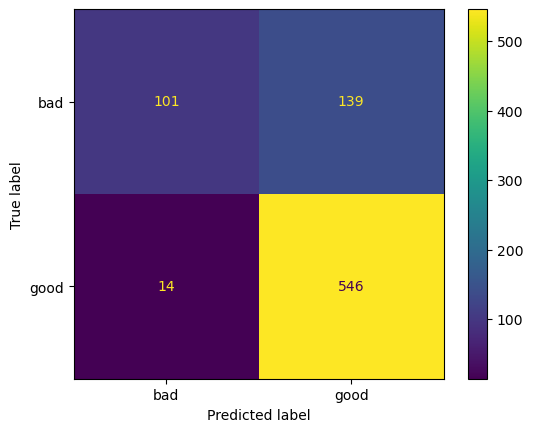

              precision    recall  f1-score   support

         bad       0.88      0.42      0.57       240
        good       0.80      0.97      0.88       560

    accuracy                           0.81       800
   macro avg       0.84      0.70      0.72       800
weighted avg       0.82      0.81      0.78       800


Métricas da avaliação de teste:
[[ 20  40]
 [  9 131]]


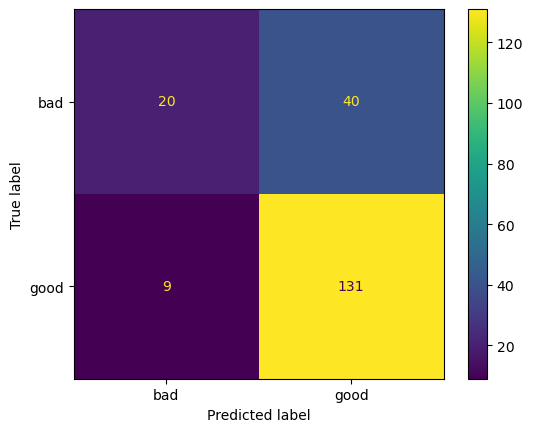

              precision    recall  f1-score   support

         bad       0.69      0.33      0.45        60
        good       0.77      0.94      0.84       140

    accuracy                           0.76       200
   macro avg       0.73      0.63      0.65       200
weighted avg       0.74      0.76      0.72       200



In [25]:
metricas_classificacao(pipe_svc)

Colocando pesos nas classes:

In [26]:
df['Risk'].value_counts()

Risk
good    700
bad     300
Name: count, dtype: int64

In [27]:
# preparação de dados para o modelo
pipe_svc = Pipeline([('pre_process', pre_processador),
                    ('svc', SVC(random_state=42, class_weight = {'bad': 7/10, 'good': 3/10}))]) # valores-padrão: kernel = 'rbf', C = '1', gamma = 'scale'
pipe_svc.fit(X_train,y_train)

Pipeline(steps=[('pre_process',
                 ColumnTransformer(transformers=[('transf_num',
                                                  Pipeline(steps=[('input_num',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Unnamed: 0', 'Age', 'Job',
                                                   'Credit amount',
                                                   'Duration']),
                                                 ('transf_cat',
                                                  Pipeline(steps=[('input_cat',
                                                                   SimpleImputer(fill_value='unknown',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Sex', 'Housing',
                                                   'Saving accounts',
                                                   'Checking account',
                                                   'Purpose'])])),
                ('svc',
                 SVC(class_weight={'bad': 0.7, 'good': 0.3}, random_state=42))])


Métricas da avaliação de treino:
[[196  44]
 [161 399]]


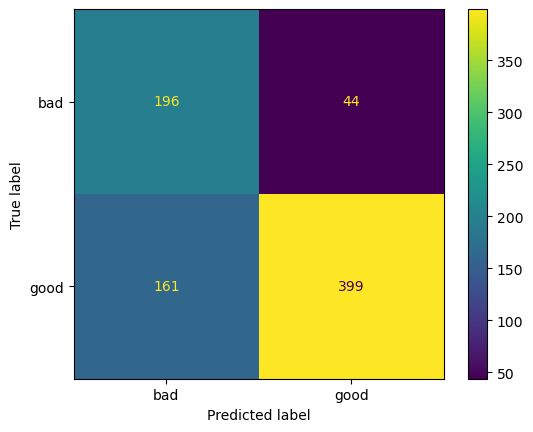

              precision    recall  f1-score   support

         bad       0.55      0.82      0.66       240
        good       0.90      0.71      0.80       560

    accuracy                           0.74       800
   macro avg       0.72      0.76      0.73       800
weighted avg       0.80      0.74      0.75       800


Métricas da avaliação de teste:
[[48 12]
 [50 90]]


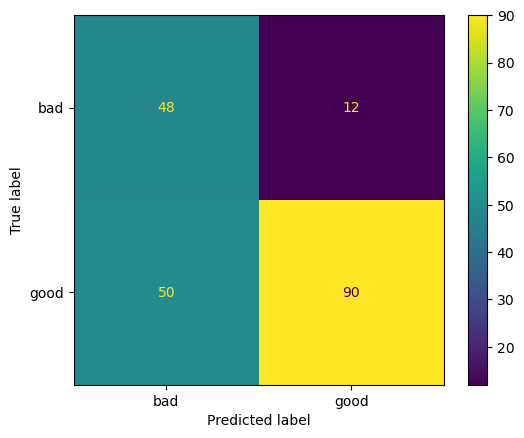

              precision    recall  f1-score   support

         bad       0.49      0.80      0.61        60
        good       0.88      0.64      0.74       140

    accuracy                           0.69       200
   macro avg       0.69      0.72      0.68       200
weighted avg       0.76      0.69      0.70       200



In [28]:
metricas_classificacao(pipe_svc)

Agora, podemos montar um gridsearch para otimizar o modelo:

In [29]:
# Primeiro, vamos usar nossa função de pré-processamento dos dados
X_train, X_test, y_train, y_test, pre_processador = pipe_pre_process()

# Preparando os dados e instanciando o modelo
pipe_svc = Pipeline([('pre_process', pre_processador),
                    ('svc', SVC(random_state=42))]) # valores-padrão: kernel = 'rbf', C = '1', gamma = 'scale'
pipe_svc.fit(X_train,y_train)

Pipeline(steps=[('pre_process',
                 ColumnTransformer(transformers=[('transf_num',
                                                  Pipeline(steps=[('input_num',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Unnamed: 0', 'Age', 'Job',
                                                   'Credit amount',
                                                   'Duration']),
                                                 ('transf_cat',
                                                  Pipeline(steps=[('input_cat',
                                                                   SimpleImputer(fill_value='unknown',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Sex', 'Housing',
                                                   'Saving accounts',
                                                   'Checking account',
                                                   'Purpose'])])),
                ('svc', SVC(random_state=42))])

In [30]:
np.linspace(1,10,10)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [31]:
np.logspace(-2,2,5)

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [32]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [33]:
# Escolhendo os parâmetros para o gridsearch
param_grid_svc = {"svc__kernel": ["linear", "rbf", "poly"],
                 "svc__C": np.logspace(-2,2,5),
                 "svc__gamma": np.logspace(-2,2,5)}

splitter = StratifiedKFold(n_splits=5, shuffle = True, random_state = 42)

grid_svc = GridSearchCV(estimator= pipe_svc,
                       param_grid= param_grid_svc,
                       cv=splitter,
                       verbose= 10,
                       n_jobs= -1)
grid_svc.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('pre_process',
                                        ColumnTransformer(transformers=[('transf_num',
                                                                         Pipeline(steps=[('input_num',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Unnamed: '
                                                                          '0',
                                                                          'Age',
                                                                          'Job',
                                                                          'Credit '
                                                                          'amount',
                                                                          'Duration']),
                                                                        ('transf_cat',
                                                                         Pipeline(steps=[('input_cat',
                                                                                          SimpleImputer(...alue='unknown',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder())]),
                                                                         ['Sex',
                                                                          'Housing',
                                                                          'Saving '
                                                                          'accounts',
                                                                          'Checking '
                                                                          'account',
                                                                          'Purpose'])])),
                                       ('svc', SVC(random_state=42))]),
             n_jobs=-1,
             param_grid={'svc__C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'svc__gamma': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'svc__kernel': ['linear', 'rbf', 'poly']},
             verbose=10)

In [34]:
grid_svc.best_params_

{'svc__C': 100.0, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


Métricas da avaliação de treino:
[[114 126]
 [ 28 532]]


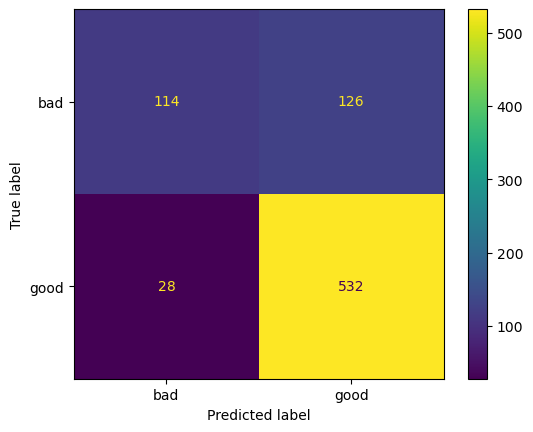

              precision    recall  f1-score   support

         bad       0.80      0.47      0.60       240
        good       0.81      0.95      0.87       560

    accuracy                           0.81       800
   macro avg       0.81      0.71      0.74       800
weighted avg       0.81      0.81      0.79       800


Métricas da avaliação de teste:
[[ 23  37]
 [ 13 127]]


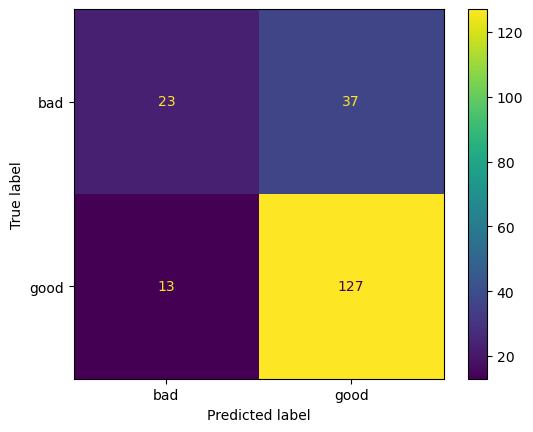

              precision    recall  f1-score   support

         bad       0.64      0.38      0.48        60
        good       0.77      0.91      0.84       140

    accuracy                           0.75       200
   macro avg       0.71      0.65      0.66       200
weighted avg       0.73      0.75      0.73       200



In [35]:
metricas_classificacao(grid_svc)

Com o balanceamento:

In [36]:
# Primeiro, vamos usar nossa função de pré-processamento dos dados
X_train, X_test, y_train, y_test, pre_processador = pipe_pre_process()

# Preparando os dados e instanciando o modelo
pipe_svc = Pipeline([('pre_process', pre_processador),
                    ('svc', SVC(random_state=42, class_weight = 'balanced'))]) # valores-padrão: kernel = 'rbf', C = '1', gamma = 'scale'
pipe_svc.fit(X_train,y_train)

# Escolhendo os parâmetros para o gridsearch
param_grid_svc = {"svc__kernel": ["linear", "rbf", "poly"],
                 "svc__C": np.logspace(-2,2,5),
                 "svc__gamma": np.logspace(-2,2,5)}

splitter = StratifiedKFold(n_splits=5, shuffle = True, random_state = 42)

grid_svc = GridSearchCV(estimator= pipe_svc,
                       param_grid= param_grid_svc,
                       cv=splitter,
                       verbose= 10,
                       n_jobs= -1)
grid_svc.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('pre_process',
                                        ColumnTransformer(transformers=[('transf_num',
                                                                         Pipeline(steps=[('input_num',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Unnamed: '
                                                                          '0',
                                                                          'Age',
                                                                          'Job',
                                                                          'Credit '
                                                                          'amount',
                                                                          'Duration']),
                                                                        ('transf_cat',
                                                                         Pipeline(steps=[('input_cat',
                                                                                          SimpleImputer(...
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder())]),
                                                                         ['Sex',
                                                                          'Housing',
                                                                          'Saving '
                                                                          'accounts',
                                                                          'Checking '
                                                                          'account',
                                                                          'Purpose'])])),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=42))]),
             n_jobs=-1,
             param_grid={'svc__C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'svc__gamma': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'svc__kernel': ['linear', 'rbf', 'poly']},
             verbose=10)


Métricas da avaliação de treino:
[[111 129]
 [ 57 503]]


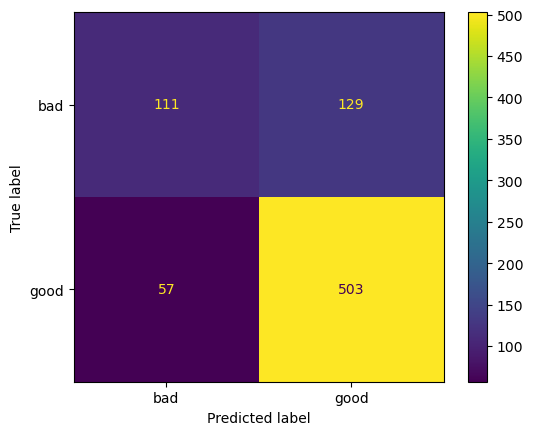

              precision    recall  f1-score   support

         bad       0.66      0.46      0.54       240
        good       0.80      0.90      0.84       560

    accuracy                           0.77       800
   macro avg       0.73      0.68      0.69       800
weighted avg       0.76      0.77      0.75       800


Métricas da avaliação de teste:
[[ 27  33]
 [ 21 119]]


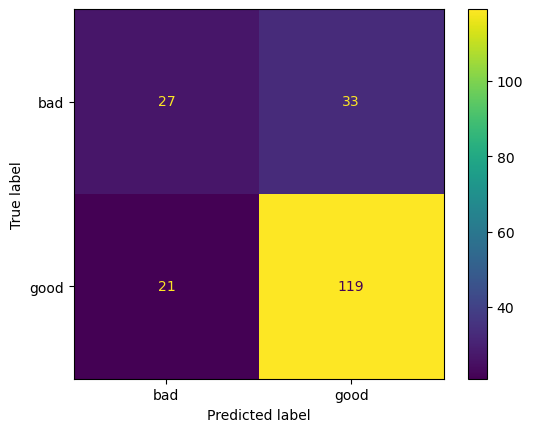

              precision    recall  f1-score   support

         bad       0.56      0.45      0.50        60
        good       0.78      0.85      0.82       140

    accuracy                           0.73       200
   macro avg       0.67      0.65      0.66       200
weighted avg       0.72      0.73      0.72       200



In [37]:
metricas_classificacao(grid_svc)

E esse é o SVM para classificação! :)

O SVM também pode ser utilizado para regressão, vamos ver a seguir!

____
____
____

## 6) SVM para regressão

Embora fizemos nossa apresentação do SVM como um classificador, também é possível utilizar este método para regressão!

Todos os elementos do classificador SVM (margem, kernel, etc.) também são relevantes aqui.

A ideia é bem simples: utilização de um kernel para que um modelo de **regressão linear seja treinado no espaço de features**. No espaço de inputs, este modelo é refletido como uma regressão não-linear (da mesma forma que, no caso de classificação, fronteiras de decisão lineares no espaço de features são refletidas como fronteiras não-lineares no espaçõ de input).

A principal diferença é que o conceito de margem também está presente, de modo que **apenas alguns pontos efetivamente vão contriuir para a regressão**. Neste caso, são os pontos **dentro da margem** (região conhecida como $\epsilon-$tubo) que serão estes vetores de suporte. Ou seja, pontos que estão fora da margem não contribuem para a função de custo.

<img src=https://www.saedsayad.com/images/SVR_5.png width=600>

Uma comparação entre classificadores e regressores SVM:

<img src=https://miro.medium.com/max/1100/1*XE9jt0r1yAW8LnliQ3mllQ.png width=600>

A classe de regressores SVM no sklearn é a [SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html). Vamos vê-la em ação!

In [38]:
df = pd.read_csv("Real estate.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'Real estate.csv'

In [ ]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


Vamos ilustrar o processo de regressão com o SVM com apenas uma feature:

In [ ]:
abs(df.corr(method = 'spearman'))['Y house price of unit area'].drop('Y house price of unit area').sort_values(ascending = False)

X3 distance to the nearest MRT station    0.775948
X4 number of convenience stores           0.617333
X5 latitude                               0.578419
X6 longitude                              0.437672
X2 house age                              0.281753
X1 transaction date                       0.066928
No                                        0.047515
Name: Y house price of unit area, dtype: float64

<AxesSubplot: ylabel='Frequency'>

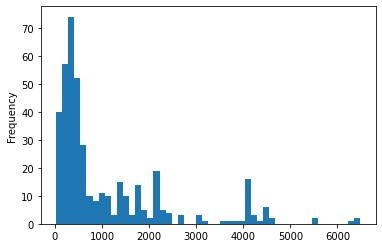

In [ ]:
df['X3 distance to the nearest MRT station'].plot(kind = 'hist', bins = 50)

<AxesSubplot: xlabel='X3 distance to the nearest MRT station', ylabel='Y house price of unit area'>

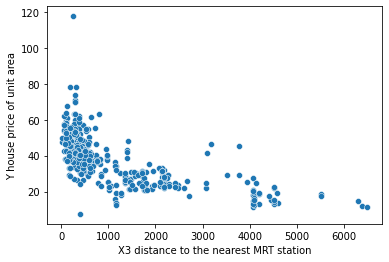

In [ ]:
sns.scatterplot(data = df,
                x = 'X3 distance to the nearest MRT station',
                y = 'Y house price of unit area')

In [ ]:
def pipe_pre_process_house_prices():
    # Para facilitação de carregamento e transformação de dados
    
    # Carregamento de dados
    df = pd.read_csv('Real estate.csv')
    
    # Definição de features e target
    X = df.drop(columns='Y house price of unit area')
    y = df["Y house price of unit area"]
    
    # Particionamento dos conjuntos de treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    
    #================================
    # Tratamento dos dados numéricos
    pipe_features_num = Pipeline([("input_num", SimpleImputer(strategy = "mean")), # substituindo valores nulos pela média
                                 ("scaler", StandardScaler())]) # padronização dos dados
    
    
    features_num = X_train.select_dtypes(include=np.number).columns.tolist() # selecionando apenas as colunas numéricas
    #==============================
    # Tratamento de features categóricas
    pipe_features_cat = Pipeline([("input_cat", SimpleImputer(strategy = "constant", fill_value = "unknown")), # dados categóricos faltantes
                                 ("onehot", OneHotEncoder())]) # transformação de dados categóricos
    
    features_cat = X_train.select_dtypes(exclude=np.number).columns.tolist() # selecionando apenas colunas categóricas
    #==============================
    # Aplicando as transformações nos nossos dados
    pre_processador = ColumnTransformer([("transf_num", pipe_features_num, features_num),
                                        ("transf_cat", pipe_features_cat, features_cat)])
    
    return X_train, X_test, y_train, y_test, pre_processador

Vamos fazer o fit com o regressor SVR:

In [ ]:
from sklearn.svm import SVR

# Pré-processamento
X_train, X_test, y_train, y_test, pre_processador = pipe_pre_process_house_prices()

features = ['X3 distance to the nearest MRT station']

svr = SVR(epsilon = 10)
svr.fit(X_train[features], y_train)

SVR(epsilon=10)

Vamos fazer o fit com um regressor linear:

In [ ]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test, pre_processador = pipe_pre_process_house_prices()

LR = LinearRegression()
LR.fit(X_train[features], y_train)

LinearRegression()

Vamos plotar nossos modelos

C:\Users\cstefano\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\cstefano\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


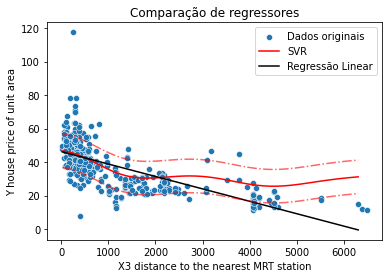

In [ ]:
sns.scatterplot(data = df,
                x = 'X3 distance to the nearest MRT station',
                y = 'Y house price of unit area')

# Vamos gerar valores para "x" e realizar as predições correspondentes
x_range = np.linspace(X_train[features].min(), X_train[features].max(), 100)

y_LR = LR.predict(x_range.reshape(-1,1))
y_svr = svr.predict(x_range.reshape(-1,1))

plt.plot(x_range, y_svr, 'r') # plota o regressor SVR
plt.plot(x_range, y_LR, 'k') #plota o regressor linear

plt.legend(["Dados originais", "SVR", "Regressão Linear"])
plt.title("Comparação de regressores")

plt.plot(x_range, y_svr + 10, '-.r', alpha = 0.6)
plt.plot(x_range, y_svr - 10, '-.r', alpha = 0.6)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
# Similarmente ao que fizemos acima, mas para regressão:
def metricas_regressao(estimator, features):
    #=================
    print("\nMétricas da avaliação de treino:")
    y_pred_train = estimator.predict(X_train[features]) # predição sobre os dados de treinamento
    
    print(f"R^2: {r2_score(y_train, y_pred_train):.2f}")
    print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")
    
    #=================
    print("\nMétricas da avaliação de teste:")
    y_pred_test = estimator.predict(X_test[features]) # predição sobre os dados de teste
    
    print(f"R^2: {r2_score(y_test, y_pred_test):.2f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}")

In [ ]:
metricas_regressao(svr, features)


Métricas da avaliação de treino:
R^2: 0.47
MAE: 7.17
RMSE: 9.94

Métricas da avaliação de teste:
R^2: 0.53
MAE: 6.96
RMSE: 8.88


In [ ]:
metricas_regressao(LR, features)


Métricas da avaliação de treino:
R^2: 0.43
MAE: 7.36
RMSE: 10.34

Métricas da avaliação de teste:
R^2: 0.54
MAE: 6.92
RMSE: 8.79


E se alterarmos os parâmetros?

In [ ]:
svr = SVR(C = 1000, epsilon = 10)
svr.fit(X_train[features], y_train)

SVR(C=1000, epsilon=10)

C:\Users\cstefano\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\cstefano\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


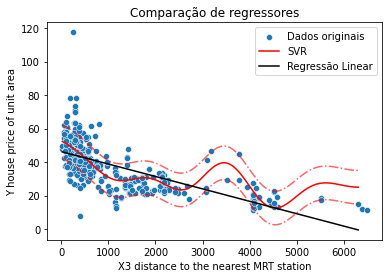

In [ ]:
sns.scatterplot(data = df,
                x = 'X3 distance to the nearest MRT station',
                y = 'Y house price of unit area')

# Vamos gerar valores para "x" e realizar as predições correspondentes
x_range = np.linspace(X_train[features].min(), X_train[features].max(), 100)

y_LR = LR.predict(x_range.reshape(-1,1))
y_svr = svr.predict(x_range.reshape(-1,1))

plt.plot(x_range, y_svr, 'r') # plota o regressor SVR
plt.plot(x_range, y_LR, 'k') #plota o regressor linear

plt.legend(["Dados originais", "SVR", "Regressão Linear"])
plt.title("Comparação de regressores")

plt.plot(x_range, y_svr + 10, '-.r', alpha = 0.6)
plt.plot(x_range, y_svr - 10, '-.r', alpha = 0.6)

In [ ]:
metricas_regressao(svr, features)


Métricas da avaliação de treino:
R^2: 0.55
MAE: 6.60
RMSE: 9.22

Métricas da avaliação de teste:
R^2: 0.62
MAE: 5.97
RMSE: 8.02
